<a href="https://www.kaggle.com/code/dheerajanumula/eda-project-1-google-play-store-apps?scriptVersionId=255381038" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory Data Analysis of Google Play Store Apps

-> To begin the analysis, we import the essential Python libraries:

**pandas** for data manipulation and analysis.

**numpy** for numerical operations.

**matplotlib.pyplot** for visualizing the data.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Perform Data Preparation and Cleaning

-> We load the Google Play Store dataset using pandas.read_csv(), which reads the data from the provided file path and stores it in a DataFrame named df.

In [2]:
df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
df=pd.DataFrame(df)

-> **`df.head()`** to display the first five rows of the dataset and get a quick overview of its structure and contents.


In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**Notes**: The first few rows show app names, categories, ratings, and other features. We can also spot some inconsistent or unusual values that may need cleaning.
Like Last Updated looks like a string

-> We print the number of rows and columns in the dataset using **`df.shape`** to understand the dataset's overall size.


In [4]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 10841
Columns: 13


**->** We use **`df.info()`** to get a concise summary of the dataset, including data types and non-null counts.  
Then, **`df.isnull().sum()`** helps us identify how many missing values are present in each column.


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

 ### ***Cleaning Data***  

In [6]:
# Fill missing 'Rating' with 0
df['Rating'] = df['Rating'].fillna(0)

# Fill missing 'Type' with 'Not Available'
df['Type'] = df['Type'].fillna('Not Available')

# Fill other missing columns with 'Not Available'
df['Content Rating'] = df['Content Rating'].fillna('Not Available')
df['Current Ver'] = df['Current Ver'].fillna('Not Available')
df['Android Ver'] = df['Android Ver'].fillna('Not Available')

In [7]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y', errors='coerce')

df = df[df['Last Updated'].notna()]

The `Last Updated` column was converted to proper datetime format using `pd.to_datetime()` to enable accurate date-based analysis.


In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  object        
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.2+ MB


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

-> Now We can see All columns are clean without any null Values just a date with a single null value which is fine



# EDA

In [9]:
print("Mean Rating:", df['Rating'].mean())

Mean Rating: 3.621771217712177


In [10]:
df['Reviews'] = df['Reviews'].astype(int)
print("Total Reviews:", df['Reviews'].sum())


Total Reviews: 4814617393


### Questions about Dataset


**How many apps are in the dataset?**

In [11]:
print("Total number of apps:", len(df))


Total number of apps: 10840


**How many apps are free and how many are paid?**

In [12]:
print(df['Type'].value_counts())


Type
Free             10039
Paid               800
Not Available        1
Name: count, dtype: int64


**What is the most common app category?**

In [13]:
print(df['Category'].value_counts().head(1))


Category
FAMILY    1972
Name: count, dtype: int64


**What is the average rating of apps?**

In [14]:
print("Average Rating:", df['Rating'].mean())


Average Rating: 3.621771217712177


## Visualizations using Matplotlib 


**Bar chart of Free vs Paid apps**

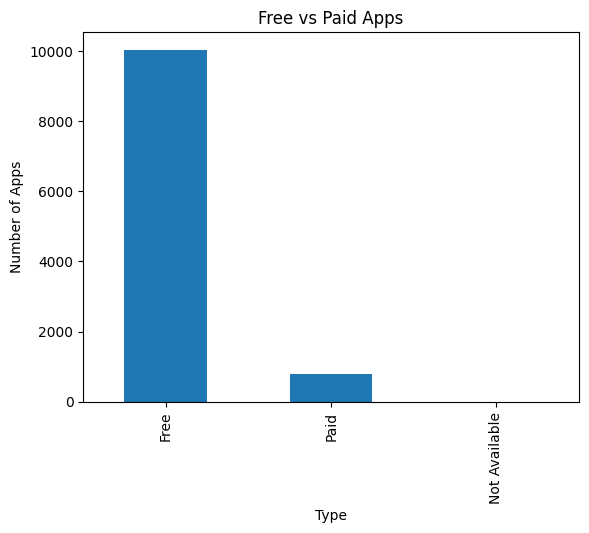

In [15]:
df['Type'].value_counts().plot(kind='bar')
plt.title("Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Number of Apps")
plt.show()

**Notes** : Most apps are Free

**Top 5 Categories Bar Chart**


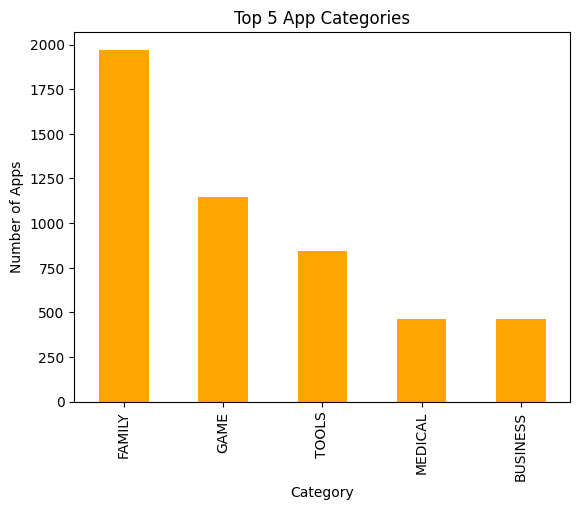

In [16]:
df['Category'].value_counts().head(5).plot(kind='bar', color='orange')
plt.title("Top 5 App Categories")
plt.ylabel("Number of Apps")
plt.show()

**Notes** : Most Apps are Family Related followed by games and Tools

**Histogram of Ratings**

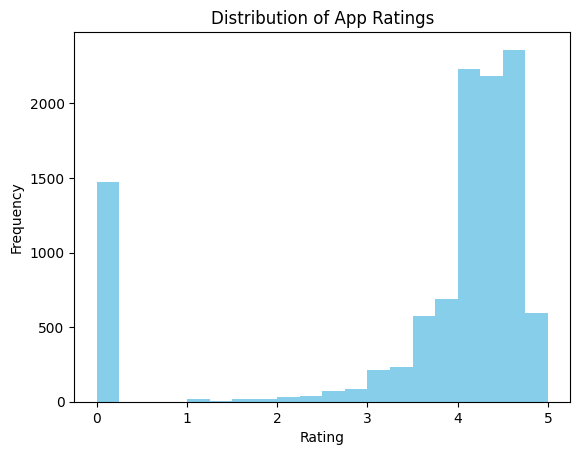

In [17]:
df['Rating'].plot(kind='hist', bins=20, color='skyblue')
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()

**Notes**: Most Apps are rated between 3.5 and 5.0 , some of the apps dont have ratings data


**Pie Chart: App Distribution by Category**

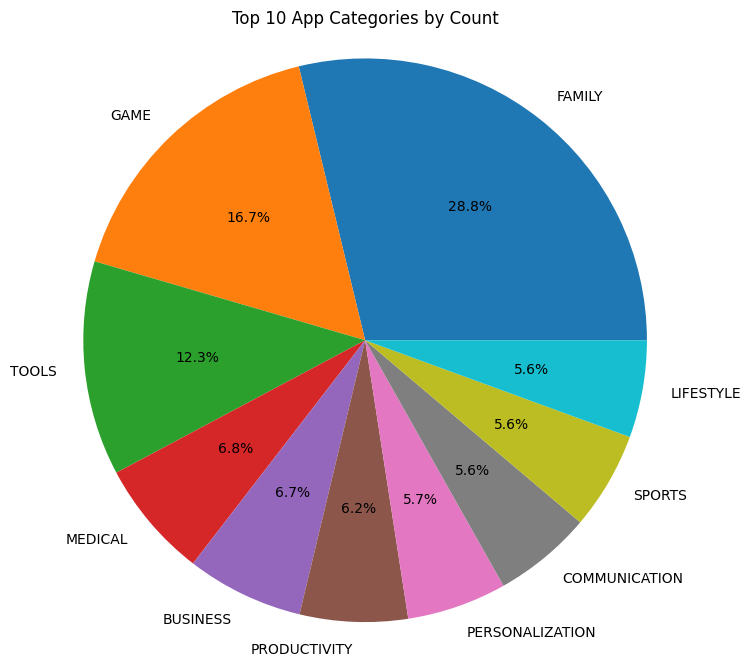

In [18]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts[:10], labels=category_counts.index[:10], autopct='%1.1f%%')
plt.title('Top 10 App Categories by Count')
plt.axis('equal')
plt.show()

**Notes**: Most Installed Categories are Family and we see there apps which are useful for everyday chores.

**Top 10 Apps with Most Installs**

In [19]:
# Clean 'Installs' column if not already cleaned
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).replace('Free', '0')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Group by App and get maximum installs per App
top_installs = df.groupby('App')['Installs'].max().sort_values(ascending=False).head(10)
print(top_installs)



App
Gmail                            1000000000
Google Street View               1000000000
Subway Surfers                   1000000000
Facebook                         1000000000
Skype - free IM & video calls    1000000000
Google                           1000000000
Google Chrome: Fast & Secure     1000000000
Google Drive                     1000000000
Google News                      1000000000
Google Play Books                1000000000
Name: Installs, dtype: int64


**Notes**: The top 10 most installed apps each have over **1 billion installs**, including major Google services and popular social/media apps.  
This reflects the dominance of **utility and communication apps** on the Play Store.


**Pie Chart: App Distribution by Content Rating**

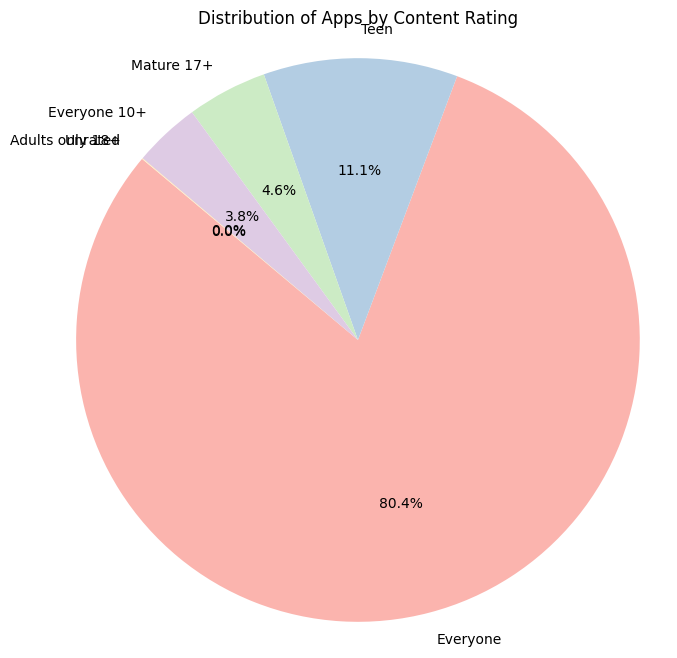

In [20]:
# Count of each Content Rating
content_counts = df['Content Rating'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(content_counts, labels=content_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Apps by Content Rating')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


**Notes**: Most apps are suitable for everyone

**Pie Chart: Teen-Rated Apps – Show Top 10 Categories**

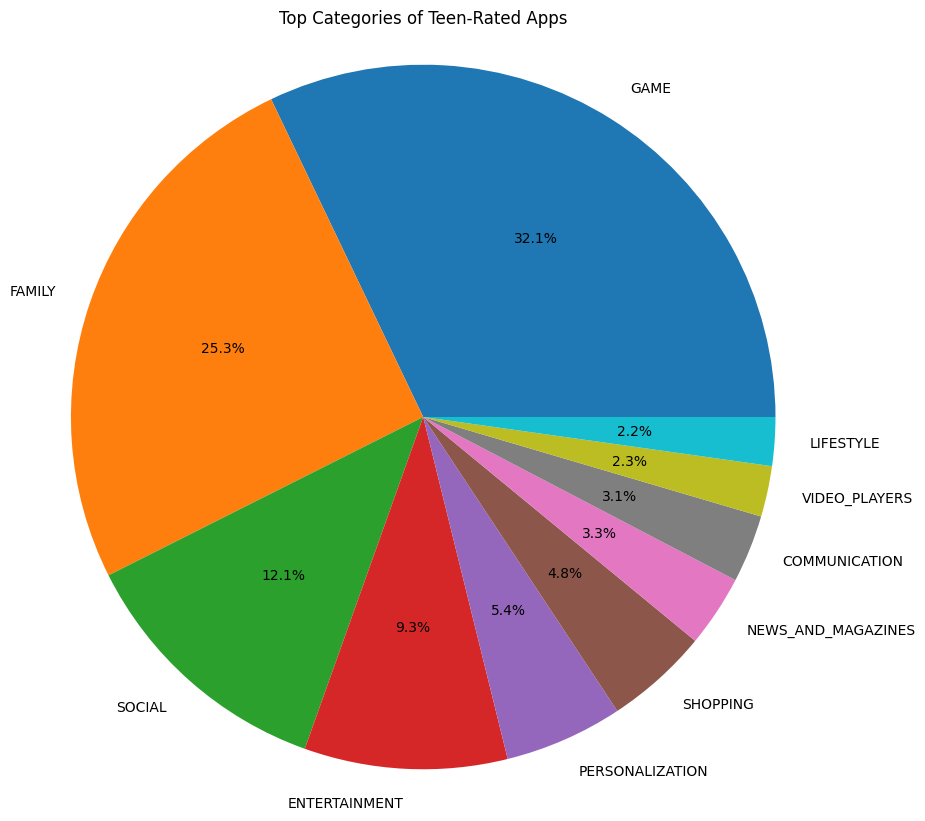

In [21]:
teen_apps = df[df['Content Rating'] == 'Teen']
teen_counts = teen_apps['Category'].value_counts().head(10)

plt.figure(figsize=(10, 10))
plt.pie(teen_counts, labels=teen_counts.index, autopct='%1.1f%%')
plt.title('Top Categories of Teen-Rated Apps')
plt.axis('equal')
plt.show()

**Notes**:Based on Pie chart, most teens are using game apps followed by family and social.

##  Summary of Google Play Store Dataset Analysis

This dataset provides insights into **10,840 Android apps** listed on the Google Play Store. Here's what we discovered:

-  **Most apps are Free**, with over **10000 apps** available at no cost.
-  **"Family"** is the most common category, followed by **Games** and **Tools**, indicating a focus on educational, entertainment, and utility apps.
-  **Average rating is 3.62**, with most apps rated between **3.5 and 5.0**. Some apps do not have rating data.
-  The total number of reviews across all apps exceeds **4.8 billion**, showing heavy user engagement.
-  The **top 10 apps**, like Gmail, Facebook, and Google Chrome, each have **over 1 billion installs**, dominated by **Google apps** and social/utility platforms.
-  Based on content ratings, **most apps are suitable for everyone**, and **Teen-rated apps are largely games**, followed by family and social categories.

Overall, the dataset highlights that **free, family-oriented, and high-utility apps dominate the Play Store**, both in quantity and user reach.
